<a href="https://colab.research.google.com/github/magedyasse/ML-Topic/blob/Min-project-ml/Predication_the_charges_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predication the charges

----
# Using Linear_Regression



 ### 1 - Import  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Read Data

In [3]:
df = pd.read_csv('/content/insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1272,43,male,25.52,5,no,southeast,14478.33015
1093,22,female,30.40,0,yes,northwest,33907.54800
196,39,female,32.80,0,no,southwest,5649.71500
732,24,female,30.10,3,no,southwest,4234.92700
585,33,female,28.27,1,no,southeast,4779.60230


## 3 - explor

In [4]:
df.info()

# From My Info i don't have any Null value
# age , children ==> int
# Body Mass Index (bmi) , charges ==> float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.min()

,0
age,18
sex,female
bmi,15.96
children,0
smoker,no
region,northeast
charges,1121.8739


In [7]:
df.max()

,0
age,64
sex,male
bmi,53.13
children,5
smoker,yes
region,southwest
charges,63770.42801


From Max and Min Good for  Scaler

### Check for missing value


## cmap


1.   coolwarmm
2.   plasma
3.   magma
4.   YlGnBu
5.   Wistia









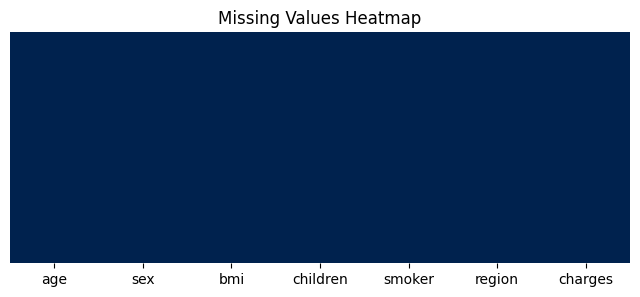

In [36]:
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
df.shape

(1338, 7)

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
df.age.value_counts().head(10)

,count
age,
18,69
19,68
46,29
52,29
50,29
47,29
48,29
51,29
45,29


In [11]:
df.bmi.value_counts().head(10)

,count
bmi,
32.300,13
28.310,9
30.800,8
31.350,8
30.495,8
30.875,8
34.100,8
28.880,8
25.460,7


In [56]:
print(df['charges'].describe())

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


In [65]:
df['charges'].max() - df['charges'].min()

62648.554110000005

In [12]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 1


Drop Duplication
I'will Remove Duplication From df and Save in  df_cleaned

In [13]:
df.drop_duplicates(inplace=True)
print("Number of duplicated rows:", df.duplicated().sum())
print("_"*30)
df.head(5)

Number of duplicated rows: 0
______________________________


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
num_Col=df.select_dtypes(include=np.number).columns
cat_Col=df.select_dtypes(include='object').columns

In [15]:
for col in cat_Col:
  print(col)
  print(f"unique values {df[col].unique()}",end='')
  print("\n")

sex
unique values ['female' 'male']

smoker
unique values ['yes' 'no']

region
unique values ['southwest' 'southeast' 'northwest' 'northeast']



## Note : 'sex' , smoker' and	'region' is Categorical Data there Should be Encoded

# Need To Handle Categorical Data



1.   Label Encoding
2.   One-Hot Encoding
3.   Ordinal Encoding
4.   Binary Encoding
5.   Target Encoding (Mean Encoding)



In [25]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)




/tmp/ipython-input-25-3979846721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-25-3979846721.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-25-3979846721.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [37]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,0.025587,0.006691,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,0.076596,0.017150,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,-0.003746,-0.261999,0.198401
children,0.041536,-0.017848,0.012755,1.000000,-0.007331,0.020206,0.067389
smoker,0.025587,0.076596,-0.003746,-0.007331,1.000000,0.053454,-0.787234
region,0.006691,0.017150,-0.261999,0.020206,0.053454,1.000000,-0.056070
charges,0.298308,-0.058044,0.198401,0.067389,-0.787234,-0.056070,1.000000


In [27]:
x = df.drop('charges', axis=1)
y = df['charges']

In [30]:
x.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,0.019814,0.109344,0.041536,0.025587,0.006691
sex,0.019814,1.000000,-0.046397,-0.017848,0.076596,0.017150
bmi,0.109344,-0.046397,1.000000,0.012755,-0.003746,-0.261999
children,0.041536,-0.017848,0.012755,1.000000,-0.007331,0.020206
smoker,0.025587,0.076596,-0.003746,-0.007331,1.000000,0.053454
region,0.006691,0.017150,-0.261999,0.020206,0.053454,1.000000


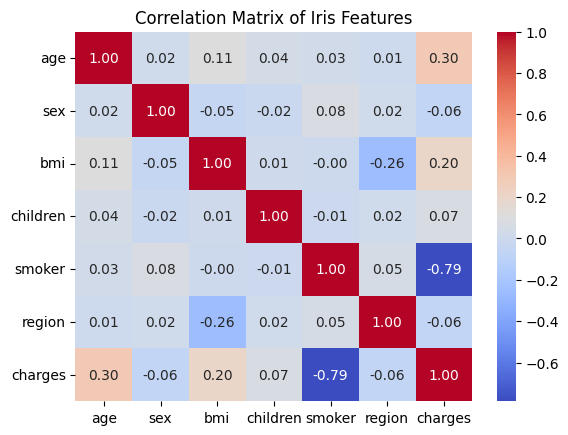

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features")
plt.show()

5 - Data Viz

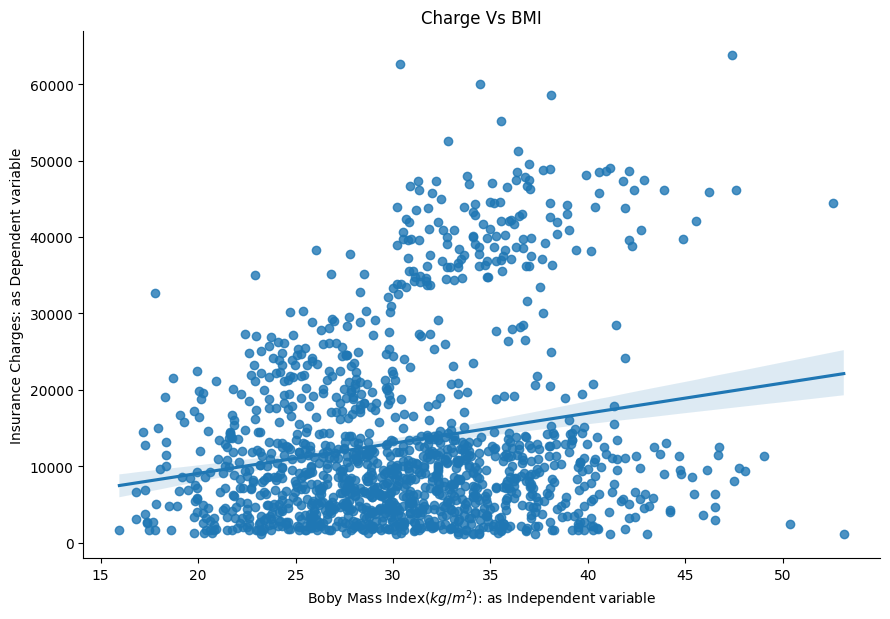

In [40]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=1.5,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

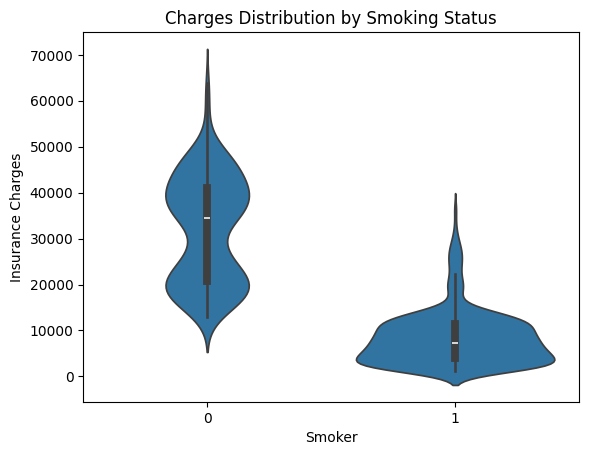

In [44]:
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Charges Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

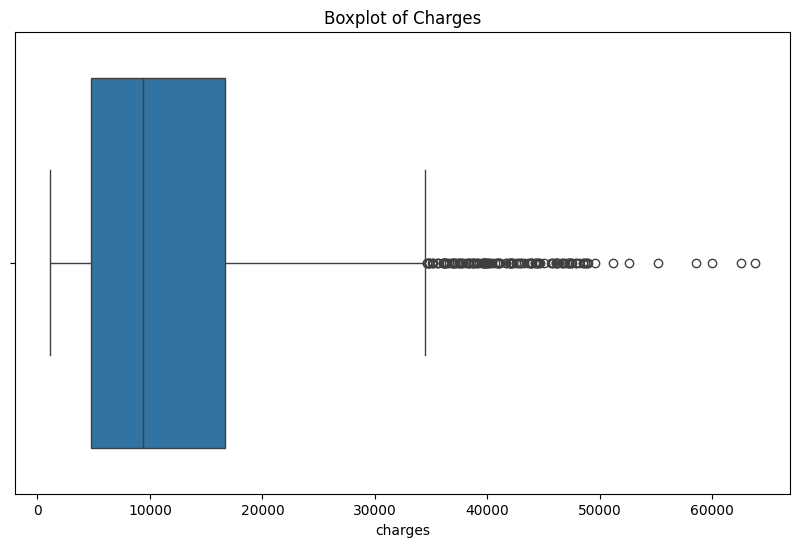

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=(df['charges']))
plt.title('Boxplot of Charges')
plt.show()

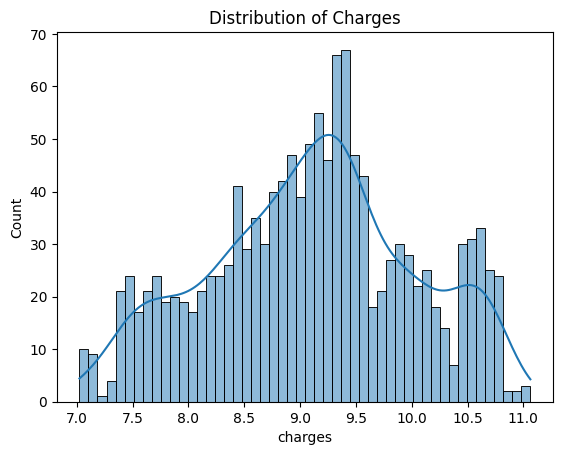

In [62]:
sns.histplot(np.log1p(df['charges']), bins=50, kde=True)
plt.title('Distribution of Charges')
plt.show()

In [63]:
# sns.pairplot(df,x_vars=['age', 'bmi', 'children', 'charges'],y_vars=['age', 'bmi', 'children', 'charges'])

6 - Split

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(935, 6) (402, 6) (935,) (402,)


7 - Model

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

8 - predication

In [51]:
y_pred = lin_reg.predict(X_test)
y_pred[:5]

array([14070.04756075,  8508.17097128, 30874.30409432,  1156.07469199,
       11586.36752388])

In [53]:
y_test[:5].values

array([ 9391.346  ,  6393.60345, 20984.0936 ,  2457.502  , 11658.11505])

9 - Acc

In [55]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

mar = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 =r2_score(y_test,y_pred)

print("Mean Absolute Error:", mar)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 : " ,r2 )



Mean Absolute Error: 4221.60700835595
Mean Squared Error: 36956838.13927271
Root Mean Squared Error: 6079.213611913363
R2 :  0.744156698012103


In [66]:
from joblib import dump
dump(lin_reg,'lin_reg.joblib')

['lin_reg.joblib']